In [2]:
import sys
sys.path.append('..')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


# Meet your team

---

This semester holds a thrilling challenge: **crafting groundbreaking pharmaceuticals**. Get ready to delve into the fascinating world of chemical databases and diverse data formats driving cheminformatics. Brace yourself for mastering revolutionary machine-learning techniques designed to analyze molecules and generate fresh ideas for potential drug breakthroughs. As you embark on this journey, envision yourself as the guiding force in an interdisciplinary team, propelling each other towards remarkable discoveries. Success awaits those who dare to push boundaries. Best of luck on your exhilarating expedition!

<div style="display: flex; justify-content: space-between">
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../../assets/profile1.png" width="100%">
        <div style="text-align: center; font-weight: bold">Nitro</div>
        <div style="text-align: center">Chemist</div>
    </div>
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../../assets/profile2.png" width="100%">
        <div style="text-align: center; font-weight: bold">Ester</div>
        <div style="text-align: center">Data Analyst</div>
    </div>
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../../assets/profile3.png" width="100%">
        <div style="text-align: center; font-weight: bold">Orion</div>
        <div style="text-align: center">Cheminformatician</div>
    </div>
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../../assets/profile4.png" width="100%">
        <div style="text-align: center; font-weight: bold">Ami</div>
        <div style="text-align: center">Biologist</div>
    </div>
</div>

# Python 🐍

----

## Environment Setup

We'll be using **Python** during these classes. Instructions on how to install all the required packages can be found in the README file on the main page of this repository. We'll be using **Jupyter** notebooks as a coding environment. To run a notebook you need to:

1. Activate the created conda environment: `conda activate mldd23`
2. Run the Jupyter server using the command: `jupyter notebook`
3. The notebook should start in your browser automatically. If that doesn't happen, you should type `localhost:8888` into your browser (8888 is the default port, but you can check the exact port in the console output when the notebook is running)

An alternative for running notebooks on your computer is using [**Colab**](https://colab.research.google.com/). In this case all the results are saved to your Google Drive. An obvious downside is that many of the chemistry-related packages will be difficult to install in Colab.

## For Beginners

The recommended Python courses:

- JU course: ["Python for data processing"](https://github.com/gmum/python-for-data-processing)
- JU course: ["Effective Python"](https://github.com/kmisztal/effective_python)
- MIT course: ["Introduction to Computer Science and Programming in Python"](https://ocw.mit.edu/courses/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/)
- Coursera: ["Python Basics"](https://www.coursera.org/learn/python-basics) 
- Coursera: ["Crash Course on Python"](https://www.coursera.org/learn/python-crash-course)
- Interactive course: ["100 Days of Code"](https://replit.com/learn/100-days-of-python)

# Machine Learning in a Nutshell

---

Machine learning is a branch of **artificial intelligence**. Machine learning methods are learning from the available data to give more accurate predictions. During this course we'll be working mostly with **supervised learning**, in which all data has a label assigned to it. For example, in toxicity prediction, the model will be trained using a compound representation and its binary toxicity label (toxic or non-toxic). If the labels are discrete, i.e. they are classes or categories, we're talking about **classification methods**. If the labels are continuous (e.g. solubility of a compound can be expressed in grams per liter of the solvent), we're talking about **regression methods**.

We will also touch on the topic of **unsupervised learning** when the labels are unknown, so we'll be trying to discover relationships in the data without knowing ground truth assignments to any of the classes. The most typical example of unsupervised learning in chemistry is **generative modeling**. Such model takes as an input a set of molecules and tries to generate new molecules that are similar to the provided ones. Thus, the model learns features of the training set and similarity between compounds. Another example of an unsupervised method is **clustering** which aims at extracting groups of similar objects.

Finally, there is another class of methods that doesn't require any input data, but rather it creates new data on its own by interacting with the (virtual) environment. These algorithms are known as **reinforcement learning**. In drug design, these methods are especially useful, as we want to optimize the chemical properties of the generated drug candidates.

## Machine Learning Materials

The recommended ML courses:

- JU course: ["Neural Networks"](https://github.com/gmum/nn2019)
- JU course: ["Machine Learning"](https://github.com/gmum/ml2017)
- Coursera: ["Machine Learning"](https://www.coursera.org/learn/machine-learning)
- Coursera: ["Deep Learning"](https://www.coursera.org/specializations/deep-learning)

## Example Code for Training Linear Regression

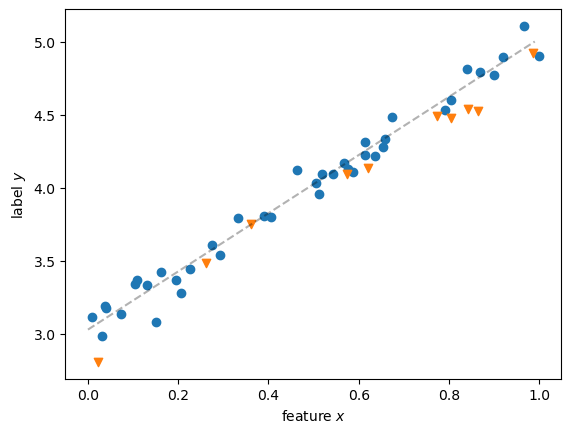

In [2]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import numpy as np


# generate random data
x = np.random.uniform(0., 1., size=50)
y = 2 * x + 3 + np.random.normal(scale=0.1, size=50)

# split the data into the training and testing sets
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

# create a linear regression model and train it using the training data
reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train)

# construct the line corresponding to the trained linear model
x_range = np.arange(0., 1., 0.01)
y_pred = reg.predict(x_range.reshape(-1, 1))

# plot everything
plt.plot(x_range, y_pred, c='k', ls='--', alpha=0.3)
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker='v')
plt.xlabel('feature $x$')
plt.ylabel('label $y$')
plt.show()

# Molecular Represenations

---

Chemical compounds are not easily understandable for computers. They are highly structured and multidimensional, so it poses a challenge to encode them in the bits of a computer drive. There are many numerical representations of molecules, each of them tailored for a different purpose. Two of the most standard molecular representations are described below. The first one is most often used to store chemical compound datasets on a computer. The second one can be used by classical machine learning models to learn property prediction tasks.

## SMILES

Simplified molecular-input line-entry system (SMILES) is a textual representation of a compound. It is the most basic representation for storing molecules in the databases due to the following two reasons:

1. text can be easily saved in CSV files,
2. this representation can be used to deterministically identify a compound (and to some extent also its spatial arrangement).

Of course there are some drawbacks of this representation. One is that the inverse transformation can be ambiguous because one compound can be represented using multiple different SIMLES strings. Also, the linear representation doesn't capture well the complexity of chemical structures.

### Simplified Procedure of SMILES Construction

![smiles](https://upload.wikimedia.org/wikipedia/commons/0/00/SMILES.png)

1. Prepare the structural formula of a compound;
2. Cut all the rings to create a connected tree of atoms;
3. Select any starting atom and write down all the bonds and atoms as you travel across the compound (DFS order);
4. Alternative paths should be in parentheses to mark the branches;
5. Atoms near the ring cuts should be marked with matching indices (watch out for the index collisions).

The above algorithm can be extended to include ordering rules, e.g. "find the longest path in the structural formula and use it as the main path", and make the SMILES representation deterministic (so called **canonical SMILES**).

In SMILES, you can also encode the spatial geometry of a compound. The SMILES strings listed below can be copy-pasted to the input below to see these compounds in 3D. Let's see how these well-known drugs are presented in the 3D space.

#### Popular drugs 

1. Ibuprofen: `CC(C)CC1=CC=C(C=C1)C(C)C(=O)O` lub `CC(C)Cc1ccc(cc1)C(C)C(=O)O`
2. Penicillin: `CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C` lub `CC1(C(N2C(S1)C(C2=O)NC(=O)CC1=CC=CC=C1)C(=O)O)C`
3. Fluoxetine: `CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F`
4. THC: `CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1)O`

#### SMILES and the spatial arrangement of atoms

The spatial arrangement is very important when designing drugs. Sometimes two compounds with the same structural formula (not considering the geometry) have completely different biological effects. Thalidomide is an infamous example that was designed as a painkiller and antiemetic, but its mirror-image form turned out to be teratogenic.

(R)-talidomid: `C1CC(=O)NC(=O)[C@@H]1N2C(=O)C3=CC=CC=C3C2=O`

(S)-talidomid: `C1CC(=O)NC(=O)[C@H]1N2C(=O)C3=CC=CC=C3C2=O`

#### Similariy of the compounds having similar effects

Oftentimes compounds inducing similar effects also have a similar structural formula and spatial arrangement of atoms. Many drugs were developed by modifying the substances that were known to have some therapeutic effects to make them more potent. The following three substances are opioids, and the first two of them are natural (extracted from opium poppy), and the third one is a narcotic obtained synthetically.

Do you see any difference between these molecules?

morphine: `CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O`

codeine: `COC1=C(O2)C3=C(C=C1)C[C@@H]4[C@]5([H])C=C[C@H](O)[C@H]2[C@@]53CCN4C`

heroine: `CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)CCN3C`

In [5]:
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import Chem

c_smiles = ["CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O", "COC1=C(O2)C3=C(C=C1)C[C@@H]4[C@]5([H])C=C[C@H](O)[C@H]2[C@@]53CCN4C", "CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)CCN3C"]
morphine = Chem.MolFromSmiles("CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@H]3[C@H](C=C4)O")
codeine = Chem.MolFromSmiles("COC1=C(O2)C3=C(C=C1)C[C@@H]4[C@]5([H])C=C[C@H](O)[C@H]2[C@@]53CCN4C")
heroine = Chem.MolFromSmiles("CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)CCN3C")

ms = [morphine, codeine, heroine]

fps = [FingerprintMols.FingerprintMol(x, minPath=1, maxPath=7, fpSize=2048, bitsPerHash=2, useHs=True, tgtDensity=0.0, minSize=128) for x in ms]

In [12]:
from rdkit import DataStructs
import pandas as pd

# the list for the dataframe
qu, ta, sim = [], [], []

# compare all fp pairwise without duplicates
for n in range(len(fps) - 1): # -1 so the last fp will not be used
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps[n+1:]) # +1 compare with the next to the last fp
    # print(c_smiles[n], c_smiles[n+1:]) # witch mol is compared with what group
    # collect the SMILES and values
    print(s)
    for m in range(len(s)):
        qu.append(c_smiles[n])
        ta.append(c_smiles[n+1:][m])
        sim.append(s[m])
print()

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'Similarity':sim}
df_final = pd.DataFrame(data=d)
df_final = df_final.sort_values('Similarity', ascending=False)
print(df_final)

# save as csv
df_final.to_csv('similarity.csv', index=False, sep=',')

[0.9940239043824701, 0.933291770573566]
[0.9389027431421446]

                                               query  \
0  CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...   
2  COC1=C(O2)C3=C(C=C1)C[C@@H]4[C@]5([H])C=C[C@H]...   
1  CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...   

                                              target  Similarity  
0  COC1=C(O2)C3=C(C=C1)C[C@@H]4[C@]5([H])C=C[C@H]...    0.994024  
2  CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)...    0.938903  
1  CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)...    0.933292  


---

<div style="display: flex; justify-content: space-between">
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../../assets/profile1.png" width="100%">
    </div>
    <div style="width: 60%; display: inline-block; margin: 20px">
        <p><strong>Nitro:</strong> Hey there! Let's talk about molecular conformations and why they're super important in drug design!

Imagine molecules as tiny, 3D puzzles. Now, each molecule can twist and turn in different ways, just like how you can arrange puzzle pieces in various configurations. These different arrangements are called *conformations*.

Now, why do we care about these conformations in drug design? Well, here's the deal: the shape of a molecule is crucial for how it interacts with other molecules in the body, like enzymes or receptors. Just like puzzle pieces need to fit together perfectly to complete the picture, molecules need to fit together in specific ways to do their job effectively.
    </div>
</div>
Here are a few examples of why conformations matter:

1. Receptor Binding: Let's say you're designing a drug to target a specific receptor in the body, like a lock and key. The shape of your drug molecule needs to match the shape of the receptor's binding site for it to work. By tweaking the conformation of your molecule, you can optimize its fit and enhance its effectiveness.

2. Enzyme Activity: Enzymes are like little molecular machines that help chemical reactions happen in the body. The shape of the molecule can affect how well it fits into the enzyme's active site, influencing the rate of the reaction. By understanding and manipulating molecular conformations, we can design molecules that either enhance or inhibit enzyme activity.

3. Stability and Reactivity: Sometimes, the way a molecule folds or twists can affect its stability or reactivity. For example, certain conformations may make a molecule more prone to breaking down in the body, reducing its effectiveness as a drug. By studying different conformations, we can identify more stable or reactive structures for better drug design.

So, whether we're aiming to improve how a drug binds to its target, enhance its activity, or ensure its stability, considering molecular conformations is key to unlocking the full potential of new chemical structures in drug discovery. It's like solving a fascinating puzzle with real-world implications for improving human health!

---

In [3]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

from ipywidgets import interact


@interact
def show_molecule(smiles=''):
    if not smiles:
        return
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    if not mol:
        return
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    mblock = Chem.MolToMolBlock(mol, kekulize=False)

    view = py3Dmol.view(width=800, height=500)
    view.addModel(Chem.MolToMolBlock(mol, kekulize=True), 'mol')
    view.setStyle({'model': -1}, {"stick": {'color': 'white', 'radius': 0.15}, "sphere": {'radius': .4}})
    view.zoomTo({'model': -1})
    view.show()

interactive(children=(Text(value='', description='smiles'), Output()), _dom_classes=('widget-interact',))

## Molecular Fingerprints

The textual representation is not perfect for use in machine learning although the advances in natural language processing enabled the effective use of this representation as well. The linearization of the compound makes the analysis of the local features (e.g. atom neighborhood) more challenging. 

An alternative approach is to represent a compound as a molecular fingerprint. The compound is converted to a numerical vector that encode selected substructures present in the compound. The set of substructures can be pre-defined as in Molecular ACCess System (**MACCS**) which consists of 166 bits associated with keys describing specific pattern in the molecular structures. (the patterns can be found [here](https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py))

![maccs](https://oi.readthedocs.io/en/latest/_images/maccs.png)

More flexible fingerprints encode all the local neighborhoods in a molecular graph. For example, Extended Connectivity FingerPrint (**ECFP**) uses the circular neighbourhood of an atom with of a given radius. For each atom in the molecule, all atoms that are not further than the radius are found. These neighborhoods are encoded into an integer taking into account the atom types (element symbol), they are hashed and mapped to the correct position in the fingerprint vector. In this case, as opposed to the MACCS keys, no atom is omitted in the encoding.

![ecfp](https://docs.chemaxon.com/display/docs/images/download/attachments/1806333/ecfp_generation.png)

You can easily notice that the downside of this representation is that the original compound cannot be decoded from the fingerprint. It can happen that two compounds are encoded in the same way, e.g. due to a hash collision when the fingerprint is too short. However, this representation gives excellent results in machine learning, outperforming even complex molecular descriptors (initially compounds were represented using values derived from compounds theoretically or experimentally).

## Classical Machine Learning Models


### Linear Regression / Logistic Regression

`from sklearn.linear_model import LinearRegression`

`from sklearn.linear_model import LogisticRegression`

[Nice example of polynomial features!](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)

![linear](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png)
![logistic](https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png)

### Random Forest

`from sklearn.ensemble import RandomForestRegressor`

`from sklearn.ensemble import RandomForestClassifier`

![rf](rf_diagram.png)

### SVM

`from sklearn.svm import SVR`

`from sklearn.svm import SVC`

![svm](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

---

<div style="display: flex; justify-content: space-between">
    <div style="width: 20%; display: inline-block; margin: 20px">
        <img src="../../assets/profile3.png" width="100%">
    </div>
    <div style="width: 60%; display: inline-block; margin: 20px">
        <p><strong>Orion:</strong> Ah, well, h-h-hello there! As a cheminformatician, let me tell you about the wonders of machine learning models, particularly in our domain. Now, brace yourself for a whirlwind tour of advantages!

First off, let's talk about Random Forests. Picture this: a forest of decision trees, each one casting its vote on the outcome. These bad boys are fantastic for handling high-dimensional data, like chemical fingerprints. They excel in dealing with noisy and missing data, plus they're less prone to overfitting compared to some other models. Random Forests are like a robust army, ready to tackle any challenge thrown their way!

Next up, Support Vector Machines (SVMs). Think of SVMs as bold boundary setters. They carve out the best possible separation between different classes in your data space. Their strength lies in their ability to handle complex relationships in high-dimensional spaces. With their kernel trick, they can transform your data into higher dimensions, where seemingly messy data can become beautifully separable. SVMs are like the precision surgeons of the machine learning world!

And then we have Linear Regression, the classic workhorse of predictive modeling. Don't underestimate its simplicity; sometimes, simplicity is its own form of genius! Linear Regression is fantastic for teasing out linear relationships between variables. In cheminformatics, it can be invaluable for tasks like quantitative structure-activity relationship (QSAR) modeling. It's like the reliable compass guiding us through the vast wilderness of data!
    </div>
</div>

---

## Programming Exercise

The code below can be used to load the data and contains the model training template. The goal is to train the best possible model that predicts two molecular properties. The first dataset is AqSolDB, which is a dataset of aqueous solubility. This is important for drug absorption in the organism. The second dataset is Blood-Brain Barrier Permeability (BBBP), which is a key property of compounds that need to impact the central nervous system.

The datasets have different types of labels: AqSolDB is a regression task (continuous labels) and BBBP is a binary classification task (can or cannot penetrate BBB).

### Solubility

In [17]:
from tdc.single_pred.adme import ADME
from tdc import Evaluator

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

class Featurizer:
    def __init__(self, y_column, smiles_col='Drug', **kwargs):
        self.y_column = y_column
        self.smiles_col = smiles_col
        self.__dict__.update(kwargs)
    
    def __call__(self, df):
        raise NotImplementedError()
        
class ECFPFeaturizer(Featurizer):
    def __init__(self, y_column, radius=2, length=1024, **kwargs):
        self.radius = radius
        self.length = length
        super().__init__(y_column, **kwargs)
    
    def __call__(self, df):
        fingerprints = []
        labels = []
        for i, row in df.iterrows():
            y = row[self.y_column]
            smiles = row[self.smiles_col]
            mol = Chem.MolFromSmiles(smiles)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, self.radius, nBits=self.length)
            fingerprints.append(fp)
            labels.append(y)
        fingerprints = np.array(fingerprints)
        labels = np.array(labels)
        return fingerprints, labels

class CustomFeaturizer(Featurizer):
    def __init__(self, y_column, radius=2, length=1024, **kwargs):
        self.radius = radius
        self.length = length
        super().__init__(y_column, **kwargs)
    
    def __call__(self, df):
        features = []
        labels = []
        for i, row in df.iterrows():
            y = row[self.y_column]
            smiles = row[self.smiles_col]
            mol = Chem.MolFromSmiles(smiles)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, self.radius, nBits=self.length)

            array = np.zeros((0, ), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(fp, array)
            np.append(array, [mol.GetNumAtoms(),mol.GetNumBonds()])
           
            features.append(array)
            labels.append(y)
            
        fingerprints = np.array(features)
        labels = np.array(labels)
        # print("fig: ", fingerprints.shape)
        # print("labels: ", labels.shape)
        return fingerprints, labels


def train(X_train, y_train, X_valid, y_valid):
    #można użyć zbiór validacynjy do wyszukiwania parametrów - pętla
    #n_estimatorsint, max_depthint
    params=[]
    for param in enumerate(params):
        print(param)
        
    # model = LinearRegression() #ECFPFeaturizer, RMSE, MAE, R2 = 1.546244500660408, 1.1799845652618102, 0.5594233882993502
    model = RandomForestRegressor(n_estimators=500) #ECFPFeaturizer, RMSE, MAE, R2 = 1.3394648754128335, 0.9766309783181242, 0.6693810351098254
    #300 estimators, CustomFeaturizer:RMSE, MAE, R2 = 1.3465563320524445, 0.9818316369900915, 0.6658710118725049
    #CustomFeaturizer: RMSE, MAE, R2 = 1.3483381311944087, 0.9821657122285314, 0.6649861701141058
    model.fit(X_train, y_train)
    return model


def predict(model, X_test):
    # TODO: use your trained model to predict solubility
    print("X_test.shape : ", X_test.shape)
    y_pred = model.predict(X_test) #predict_probd
    return y_pred


data = ADME('Solubility_AqSolDB')
split = data.get_split()

# TODO: write a new featurizer and replace the one below
featurizer = CustomFeaturizer(y_column='Y')
scores = []

rmse = Evaluator(name = 'RMSE')
mae = Evaluator(name = 'MAE')
r_squared = Evaluator(name = 'R2') # cos jak kwadrat z korelacji - jak duza częśc jest poprawnie walidowana

X_train, y_train = featurizer(split['train'])
X_valid, y_valid = featurizer(split['valid'])
X_test, y_test = featurizer(split['test'])

model = train(X_train, y_train, X_valid, y_valid)
predictions = predict(model, X_test)  # y_test won't be available during evaluation!
rmse_score = rmse(y_test, predictions)
mae_score = mae(y_test, predictions)
r2_score = r_squared(y_test, predictions)
print(f'RMSE, MAE, R2 = {rmse_score}, {mae_score}, {r2_score}')

Found local copy...
Loading...
Done!
[08:53:23] WARNING: not removing hydrogen atom without neighbors
[08:53:23] WARNING: not removing hydrogen atom without neighbors
[08:53:23] WARNING: not removing hydrogen atom without neighbors
[08:53:23] WARNING: not removing hydrogen atom without neighbors
[08:53:23] WARNING: not removing hydrogen atom without neighbors
[08:53:23] WARNING: not removing hydrogen atom without neighbors
[08:53:24] WARNING: not removing hydrogen atom without neighbors
[08:53:24] WARNING: not removing hydrogen atom without neighbors
[08:53:24] WARNING: not removing hydrogen atom without neighbors
[08:53:24] WARNING: not removing hydrogen atom without neighbors
[08:53:24] WARNING: not removing hydrogen atom without neighbors
[08:53:24] WARNING: not removing hydrogen atom without neighbors
[08:53:24] WARNING: not removing hydrogen atom without neighbors
[08:53:24] WARNING: not removing hydrogen atom without neighbors
[08:53:24] WARNING: not removing hydrogen atom withou

X_test.shape :  (1996, 1024)
RMSE, MAE, R2 = 1.3394648754128335, 0.9766309783181242, 0.6693810351098254


In [18]:
print(f'RMSE, MAE, R2 = {rmse_score}, {mae_score}, {r2_score}')

RMSE, MAE, R2 = 1.3394648754128335, 0.9766309783181242, 0.6693810351098254


In [19]:
# Use this code to save your predictions
import pandas as pd

df = pd.DataFrame({'pred': predictions})
df.index.name = 'mol_id'
df.to_csv('predictions.csv')

The most soluble compounds in the dataset:


[14:09:57] WARNING: not removing hydrogen atom without neighbors
[14:09:57] WARNING: not removing hydrogen atom without neighbors


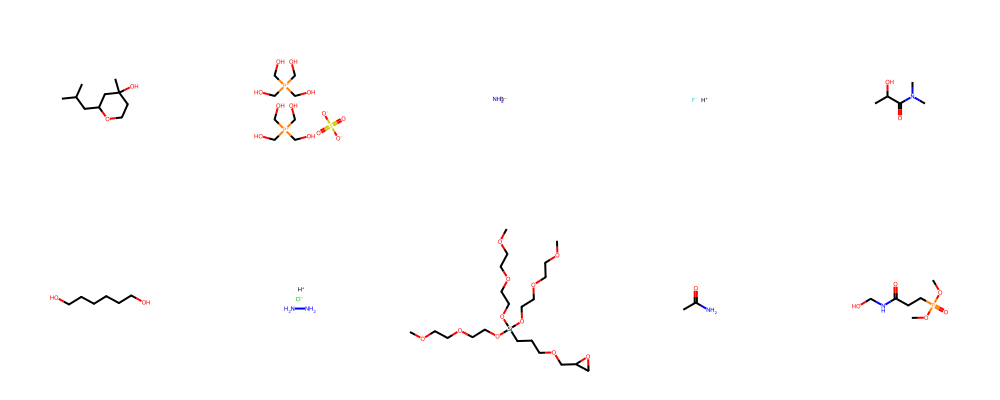

The least soluble compounds in the dataset:


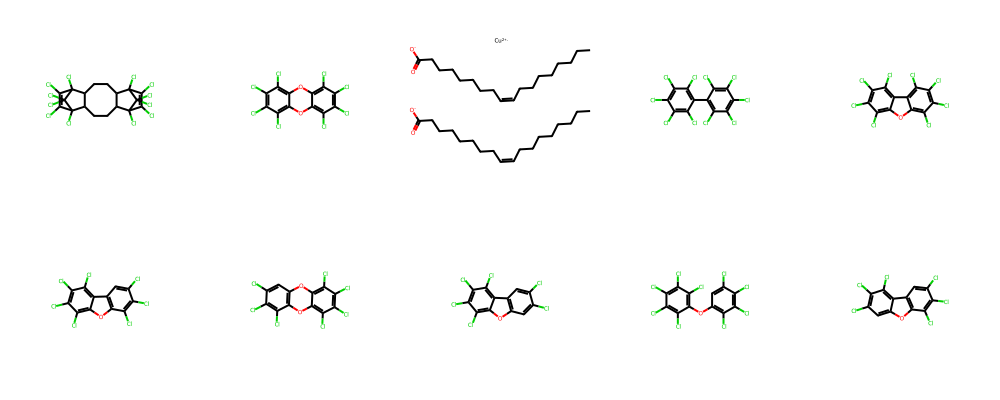

In [23]:
print('The most soluble compounds in the dataset:')
smiles_list = split['train'].sort_values('Y', ascending=False).iloc[:10].Drug
display(Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in smiles_list], molsPerRow=5))
print('The least soluble compounds in the dataset:')
smiles_list = split['train'].sort_values('Y', ascending=True).iloc[:10].Drug
display(Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in smiles_list], molsPerRow=5))

### BBBP

In [31]:
from tdc.single_pred.adme import ADME
from tdc import Evaluator

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier


class Featurizer:
    def __init__(self, y_column, smiles_col='Drug', **kwargs):
        self.y_column = y_column
        self.smiles_col = smiles_col
        self.__dict__.update(kwargs)
    
    def __call__(self, df):
        raise NotImplementedError()
        

class ECFPFeaturizer(Featurizer):
    def __init__(self, y_column, radius=2, length=1024, **kwargs):
        self.radius = radius
        self.length = length
        super().__init__(y_column, **kwargs)
    
    def __call__(self, df):
        fingerprints = []
        labels = []
        for i, row in df.iterrows():
            y = row[self.y_column]
            smiles = row[self.smiles_col]
            mol = Chem.MolFromSmiles(smiles)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, self.radius, nBits=self.length)
            fingerprints.append(fp)
            labels.append(y)
        fingerprints = np.array(fingerprints)
        labels = np.array(labels)
        return fingerprints, labels


def train(X_train, y_train, X_valid, y_valid):
    # TODO: create and train your model 
    model = SVC() # ROC AUC, accuracy = 0.7747420262664164, 0.896551724137931
    # model = LinearSVC() # ROC AUC, accuracy = 0.7256879299562227, 0.7857142857142857
    # model = SGDClassifier() # ROC AUC, accuracy = 0.7637976860537836, 0.8472906403940886
    model.fit(X_train, y_train)
    return model


def predict(model, X_test):
    return model.predict(X_test)


data = ADME('bbb_martins')
split = data.get_split(method='scaffold')

# TODO: write a new featurizer and replace the one below
featurizer = ECFPFeaturizer(y_column='Y')
scores = []

roc_auc = Evaluator(name = 'ROC AUC')
accuracy = Evaluator(name = 'Accuracy')

X_train, y_train = featurizer(split['train'])
X_valid, y_valid = featurizer(split['valid'])
X_test, y_test = featurizer(split['test'])
model = train(X_train, y_train, X_valid, y_valid)
predictions = predict(model, X_test)  # y_test won't be available during evaluation!
roc_auc_score = roc_auc(y_test, predictions)
accuracy_score = accuracy(y_test, predictions)
r2_score = r_squared(y_test, predictions)
print(f'ROC AUC, accuracy = {roc_auc_score}, {accuracy_score}')

Found local copy...
Loading...
Done!
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2030/2030 [00:00<00:00, 2581.59it/s]


ROC AUC, accuracy = 0.7747420262664164, 0.896551724137931
